Description of Data:

This dataset contains 100k dielectron events in the invariant mass range 2-110 GeV for use in outreach and education. These data were selected for use in education and outreach and contain a subset of the total event information. The selection criteria may be different from that used in CMS physics results.

Content:

1) Run: The run number of the event. 2) Event: The event number. 3, 11) E1, E2: The total energy of the electron (GeV) for electrons 1 and 2. 4, 5, 6, 12, 13, 14) px1,py1,pz1,px2,py2,pz2: The components of the momemtum of the electron 1 and 2 (GeV). 7, 15) pt1, pt2: The transverse momentum of the electron 1 and 2 (GeV). 8, 16) eta1, eta2: The pseudorapidity of the electron 1 and 2. 9, 17) phi1, phi2: The phi angle of the electron 1 and 2 (rad). 10, 18) Q1, Q2: The charge of the electron 1 and 2. 19) M: The invariant mass of two electrons (GeV).

In [ ]:
import numpy as np
import pandas as pd
cern_df = pd.read_csv("/content/dielectron.csv")
print(cern_df.head(3))
# cern_df.isna().sum() ## number of NA

      Run      Event        E1      px1         py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   

      eta1     phi1  Q1       E2       px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.03234 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.71350  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.47280  2.25895 -15.5888   2.69667   

       eta2     phi2  Q2         M  
0 -2.344030 -2.07281  -1   8.94841  
1  0.808077  2.73492   1  15.89300  
2 -2.455080  2.14857   1  38.38770  


In [ ]:
cern_df.drop_duplicates(inplace=True)
cern_df.drop(columns=["Event","Run"],inplace=True)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
nan_index = cern_df[cern_df['M'].isnull()].index
all_columns = cern_df.columns
imp_mean = IterativeImputer(random_state=0)
cern_df = pd.DataFrame(imp_mean.fit_transform(cern_df), columns=all_columns)
cern_df.loc[nan_index, 'M']

2354     16.776136
4428     20.207014
5035     18.237006
6066     19.694180
6667     23.766361
           ...    
95396    17.258600
96087    36.902300
96394    50.564600
97996    46.812000
98830     9.591940
Name: M, Length: 85, dtype: float64

In [ ]:
print(cern_df.M.describe())

count    99977.000000
mean        30.011128
std         25.247627
min          2.000080
25%         12.453700
50%         21.270800
75%         38.992700
max        109.999000
Name: M, dtype: float64


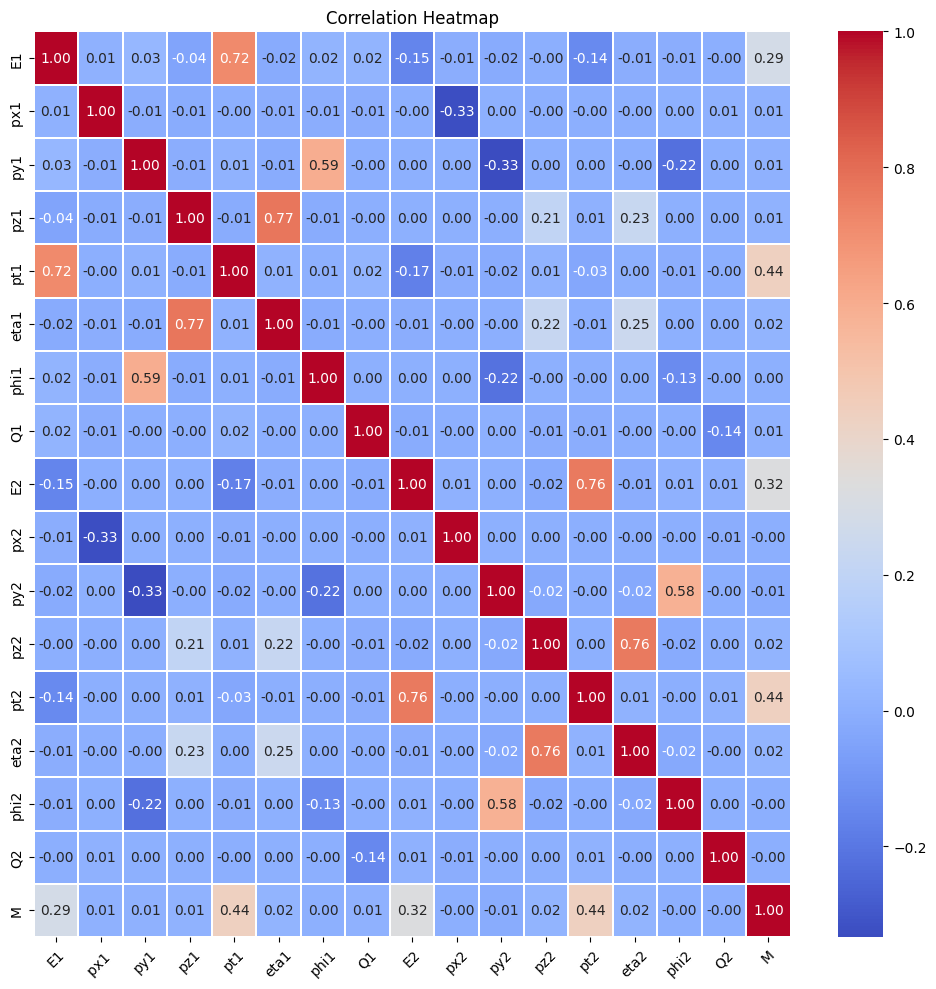

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr_matrix = cern_df.corr()
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))
# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.1, ax=ax)
# Set the title
ax.set_title('Correlation Heatmap')
# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)
# Adjust the layout to prevent cutoff of labels or tick marks
plt.tight_layout()
# Display the plot
plt.show()

In [ ]:
!pip install minisom
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=2284d72732eee2bbf29cffffc2e3d38d878890e2b8ffcea7bd0ccc10b5056619
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


MiniSom is a Python library that provides an implementation of the Self-Organizing Map (SOM) algorithm. The SOM is an unsupervised learning algorithm used for clustering and visualizing high-dimensional data. It is particularly useful for tasks such as dimensionality reduction, data visualization, and pattern recognition.

The MiniSom library offers a lightweight and efficient implementation of the SOM algorithm. It provides a flexible and customizable framework to create and train SOMs. Here is a brief description of the key components and functionalities of MiniSom:

SOM Initialization: You can initialize a SOM by specifying the grid size (number of neurons in each dimension) and the input length (number of features in the input data). The initial weights of the neurons can be randomly initialized or based on the input data.

Training: MiniSom supports two training methods: random and batch. In the random training mode, input samples are randomly selected from the input data and presented to the SOM for weight adjustment. In the batch training mode, all input samples are used together to update the weights of the neurons. The number of training iterations determines the convergence of the SOM.

Neighborhood Function: MiniSom allows you to choose between different neighborhood functions, such as Gaussian or Bubble, to define the influence of neighboring neurons during training. The neighborhood function determines how the weights of the neighboring neurons are adjusted based on the winning neuron and the distance from the winning neuron.

Quantization Error: The quantization error represents the average distance between the input samples and their respective best matching units (BMUs) or winning neurons. MiniSom provides a method to calculate the quantization error, which can be used as an evaluation metric for the quality of the SOM.

Distance Map: The distance map is a 2D grid that visualizes the distances between the neurons in the SOM grid. It provides a representation of the topology and clustering of the input data. MiniSom allows you to visualize the distance map as a colormap.

Overall, MiniSom is a useful tool for implementing and experimenting with Self-Organizing Maps in Python. It provides an intuitive interface for training SOMs, extracting cluster labels, and visualizing the results.

Reason for Standardization of cern dielectron collision data:

In some cases, standardization may lead to a clearer separation between clusters, making it easier for the clustering algorithm to identify distinct groups. This may result in an increase in the number of clusters detected.

On the other hand, standardization can also reduce the spread of the data, potentially causing some clusters to overlap or merge. This could lead to a decrease in the number of clusters identified.

In [ ]:
from minisom import MiniSom

# Extract the relevant columns for SOM clustering
data = cern_df.iloc[:, 2:20].values  # Columns 3 to 20 (index 2 to 19)
# Normalize the data
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
# Define the SOM parameters
grid_size = (10, 10)  # Adjust the grid size according to preference
input_len = data.shape[1]  # Number of input features
sigma = 1.0  # Neighborhood radius
learning_rate = 0.5  # Learning rate
iterations = 50  # Number of iterations
# Initialize the SOM
som = MiniSom(grid_size[0], grid_size[1], input_len, sigma=sigma, learning_rate=learning_rate,
              neighborhood_function='gaussian', random_seed=10)
## try to use hyperparameter tuning
# Train the SOM
som.train_random(data, iterations)
# Get the clustered labels
labels = np.zeros((data.shape[0],))
for i, x in enumerate(data):
    winner = som.winner(x)
    labels[i] = int(winner[0] * grid_size[1] + winner[1])
# Add the cluster labels to the DataFrame
cern_df['Cluster'] = labels
# Print the resulting DataFrame with cluster labels
print(cern_df.head())
# Count the number of unique clusters
num_clusters = cern_df['Cluster'].nunique()
print("Number of clusters:", num_clusters)

         E1      px1         py1       pz1       pt1     eta1     phi1   Q1  \
0  58.71410  -7.31132  10.531000 -57.29740  12.82020 -2.20267  2.17766  1.0   
1   6.61188  -4.15213  -0.579855  -5.11278   4.19242 -1.02842 -3.00284 -1.0   
2  25.54190 -11.48090   2.041680  22.72460  11.66100  1.42048  2.96560  1.0   
3  65.39590   7.51214  11.887100  63.86620  14.06190  2.21838  1.00721  1.0   
4  61.45040   2.95284 -14.622700 -59.61210  14.91790 -2.09375 -1.37154 -1.0   

        E2        px2      py2      pz2       pt2      eta2      phi2   Q2  \
0  11.2836  -1.032340 -1.88066 -11.0778   2.14537 -2.344030 -2.072810 -1.0   
1  17.1492 -11.713500  5.04474  11.4647  12.75360  0.808077  2.734920  1.0   
2  15.8203  -1.472800  2.25895 -15.5888   2.69667 -2.455080  2.148570  1.0   
3  25.1273   4.087860  2.59641  24.6563   4.84272  2.330210  0.565865 -1.0   
4  13.8871  -0.277757 -2.42560 -13.6708   2.44145 -2.423700 -1.684810 -1.0   

          M  Cluster  
0   8.94841     73.0  
1  15.8930

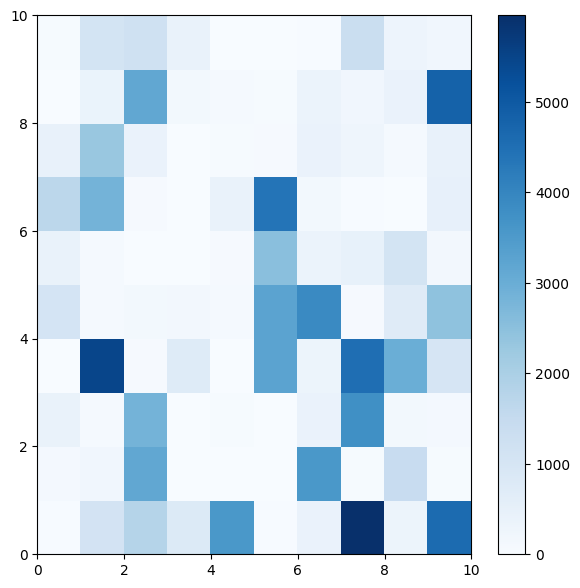

In [ ]:
## To have an idea of which neurons of the map are activated more
## often we can create another pseudocolor plot that reflects the activation frequencies:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues')
plt.colorbar()
plt.show()

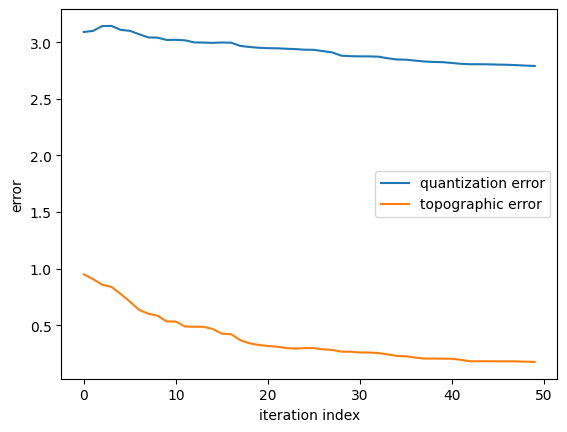

In [ ]:
som = MiniSom(10, 20, data.shape[1], sigma=3., learning_rate=.7,
              neighborhood_function='gaussian', random_seed=10)

max_iter = 50
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

Quantization error and topographic error are two measures used to evaluate the performance of a Self-Organizing Map (SOM) during training.

Quantization Error: The quantization error measures how well the SOM represents the input data. It quantifies the average distance between the input vectors and their corresponding best-matching units (BMUs) on the SOM grid. A lower quantization error indicates a better representation of the data.

Topographic Error: The topographic error measures how well the SOM preserves the topological relationships between the input vectors. It calculates the proportion of input vectors for which the two closest BMUs on the SOM grid are not adjacent. A lower topographic error indicates a better preservation of the data topology.

During the training process of the SOM, these error measures can be calculated at each step to monitor the convergence and quality of the SOM representation. The quantization error and topographic error typically decrease as the training progresses, indicating improvement in the SOM's ability to represent the input data and preserve the data topology.

In [ ]:
import plotly.graph_objects as go

# Create a scatter3d trace for each cluster
traces = []
for cluster_label in np.unique(labels):
    cluster_data = data[labels == cluster_label]
    trace = go.Scatter3d(
        x=cluster_data[:, 0],
        y=cluster_data[:, 1],
        z=cluster_data[:, 2],
        mode='markers',
        name=f'Cluster {int(cluster_label)}',
        marker=dict(
            size=3,
            opacity=0.8,
        ),
    )
    traces.append(trace)

# Set layout options
layout = go.Layout(
    title='SOM Clustering Results',
    scene=dict(
        xaxis=dict(title='Feature 1'),
        yaxis=dict(title='Feature 2'),
        zaxis=dict(title='Feature 3'),
    ),
)

# Create the figure and add the traces
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()


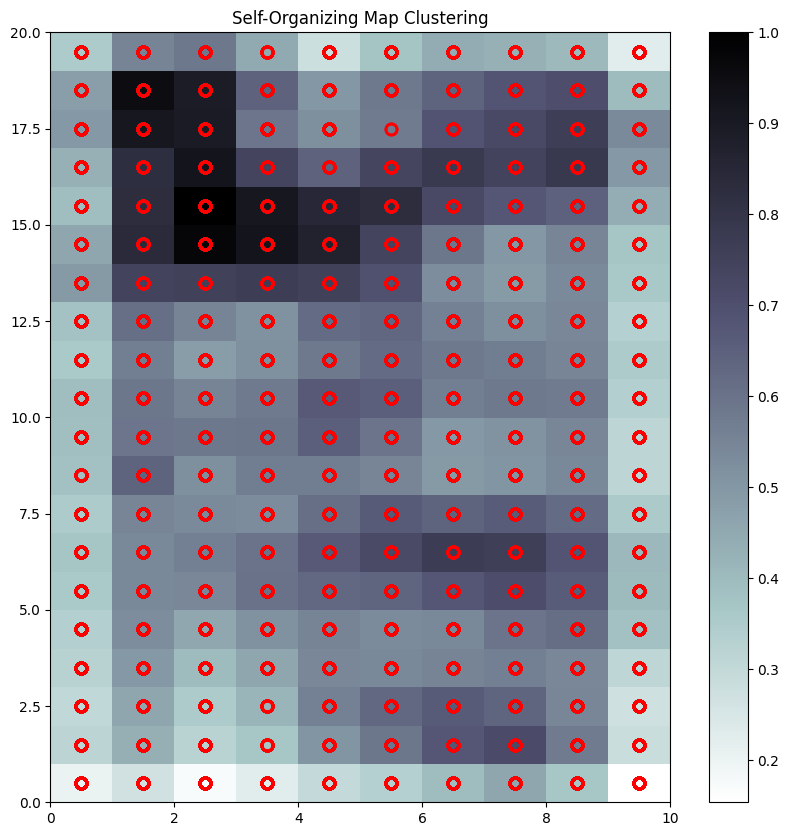

In [ ]:
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map as a colormap
plt.colorbar()

# Mark the data points with cluster labels
for i, x in enumerate(data):
    winner = som.winner(x)
    plt.plot(winner[0] + 0.5, winner[1] + 0.5, 'o', markerfacecolor='None', markeredgecolor='r', markersize=8, markeredgewidth=2)

plt.title('Self-Organizing Map Clustering')
plt.show()

The U-Matrix plot, also known as the Unified Distance Matrix, is a visualization technique commonly used with Self-Organizing Maps (SOMs). It provides insights into the topology and clustering of the input data within the SOM. bold text In a U-Matrix plot, each neuron in the SOM grid is assigned a color based on the average distance between the neuron and its neighboring neurons. The U-Matrix plot provides a visual representation of the distances and relationships between neighboring neurons, allowing for the identification of clusters, boundaries, and density variations in the input data.

The U-Matrix plot is particularly useful for understanding the topology of the SOM. It helps in identifying areas of high and low data density, where neurons that are closer together in the SOM grid represent similar or closely related data points. In areas of high data density, the color on the U-Matrix plot will be relatively darker, indicating a smaller distance between neighboring neurons. In contrast, areas of low data density will have lighter colors, indicating a larger distance between neighboring neurons.

By analyzing the U-Matrix plot, we can gain insights into the organization of the input data and identify clusters or groups of similar data points. It can help in identifying outliers, boundaries between clusters, and regions of data compression or expansion. The U-Matrix plot is a valuable tool for visualizing and interpreting the results of a SOM analysis.
